# Analysis for 2017-02-17 HST

In [ ]:
%load_ext autoreload
%autoreload 2

from importlib import reload

from imaka.reduce.nights import reduce_2017_02_16 as redu
from imaka.analysis import plot_stats

reload(redu)
reload(plot_stats)

## Date Reduction

Fully reduce the data from 20170116 HST. Don't re-run this unless you really need to as it takes awhile. After you re-run the data reduction, please remember to load it back up to onaga. 

In [ ]:
# Set this to whats appropriate for your machine.
redu.root_dir = '/Users/fatimaabdurrahman/Desktop/20170217/FLI/'

redu.make_sky()
redu.make_flat()

# Reduce open-loop, TTF-loop closed, and closed-loop images.
redu.reduce_pleiades()

Find stars and calc stats tables. Again, be sure to load these back up to onaga.

In [ ]:
redu.find_stars_pleiades_open()
redu.find_stars_pleiades_ttf
redu.find_stars_pleiades_closed()

redu.calc_star_stats()

Stack images to make the final "deep" image for open, TTF, and closed-loop data sets. 

In [10]:
#redu.stack_open()
#redu.analyze_stacks()

## Fetch stats from onaga to local machine

All the stats files should be kept on onaga. But to sync up with this machine, you can run the following utility. You will probably need to run this in an ipython window rather than from the Jupyter notebook.


In [6]:
plot_stats.fetch_stats_from_onaga(['20170217'], '/Users/jlu/work/imaka/pleiades/')

imaka@onaga.ifa.hawaii.edu:/Volumes/DATA/imaka/20170112/fli/reduce/stats/stats*.fits
/Users/jlu/work/imaka/pleiades//20170112/fli/reduce/stats/


## Plot Statistics

Below we will make a suite of standard plots. 

The best plots to look at are:
- Empirical FWHM vs. Time
- Radius of 50% EE vs. Time
- NEA vs. Time

The overall trend is that we are certainly seeing improvements in closed-loop. The TTF-loop isn't behaving as we would want it to.

### Plots:

In [38]:
%matplotlib inline

In [36]:
import plot_stats

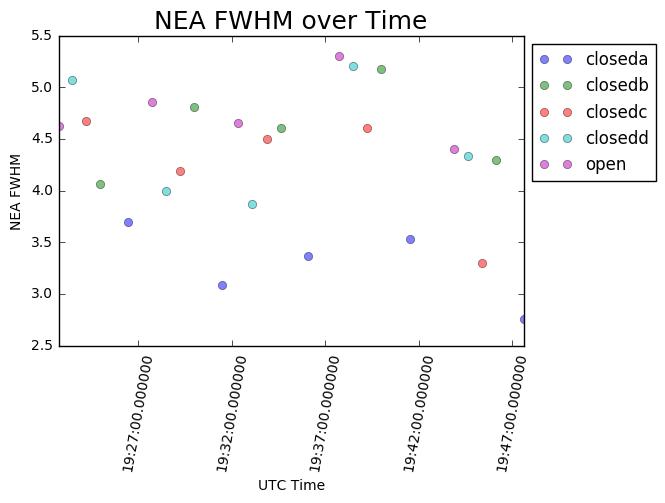

In [3]:
import glob
import matplotlib.pyplot as plt
import matplotlib
import csv
import numpy as np
import datetime
%matplotlib inline
stats_dir = '/Users/fatimaabdurrahman/Desktop/20170217/FLI/reduce/stats/'
stats_files = glob.glob(stats_dir+"*.csv")
colors = ['b', 'g', 'r', 'c', 'm', 'k']

plt.figure()
for ii in range(len(stats_files)):
    data_label = stats_files[ii].split("/")[-1].split("_")[1].split(".")[0]
    TIME_UTC = []
    NEA_FWHM = []
    with open(stats_files[ii], "r") as f:
        reader = csv.reader(f)
        for row in reader:
            if row[0] == 'Image':
                labels = [row[5], row[10], row[15]]
                full_labels = row
            else:
                TIME_UTC.append(row[5])
                NEA_FWHM.append((((float(row[10])/0.12)/np.pi)**0.5)*2)
                
    date_times = []
    for time in TIME_UTC:
        dt_obj = datetime.datetime.strptime(time, '%H:%M:%S')
        dt_obj.strftime("%I:%M:%S %p")
        date_times.append(dt_obj)
    dates = matplotlib.dates.date2num(date_times)
    plt.plot_date(dates, NEA_FWHM, colors[ii]+'o', alpha=0.5, label=data_label)

plt.legend(loc=2, bbox_to_anchor=(1, 1))
plt.xticks(rotation=80)
plt.xlabel("UTC Time")
plt.ylabel("NEA FWHM")
plt.title("NEA FWHM over Time", fontsize=18)

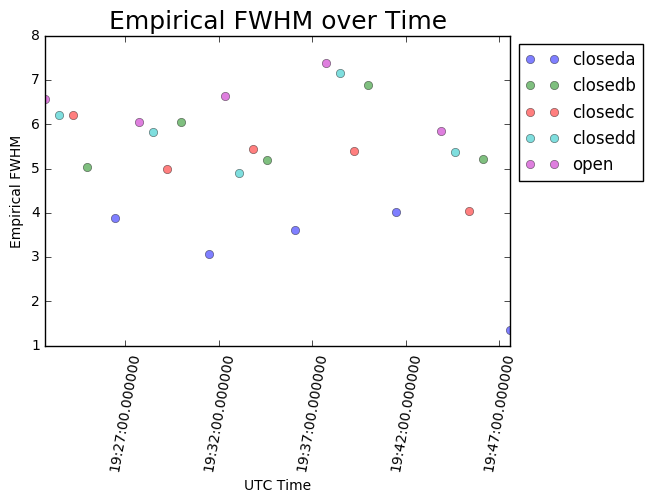

In [4]:
plt.figure()
for ii in range(len(stats_files)):
    data_label = stats_files[ii].split("/")[-1].split("_")[1].split(".")[0]
    TIME_UTC = []
    emp_FWHM = []
    with open(stats_files[ii], "r") as f:
        reader = csv.reader(f)
        for row in reader:
            if row[0] == 'Image':
                labels = [row[5], row[10], row[15]]
                full_labels = row
            else:
                TIME_UTC.append(row[5])
                emp_FWHM.append(float(row[15]))
                
    date_times = []
    for time in TIME_UTC:
        dt_obj = datetime.datetime.strptime(time, '%H:%M:%S')
        dt_obj.strftime("%I:%M:%S %p")
        date_times.append(dt_obj)
    dates = matplotlib.dates.date2num(date_times)
    plt.plot_date(dates, emp_FWHM, colors[ii]+'o', alpha=0.5, label=data_label)

plt.legend(loc=2, bbox_to_anchor=(1, 1))
plt.xticks(rotation=80)
plt.xlabel("UTC Time")
plt.ylabel("Empirical FWHM")
plt.title("Empirical FWHM over Time", fontsize=18)

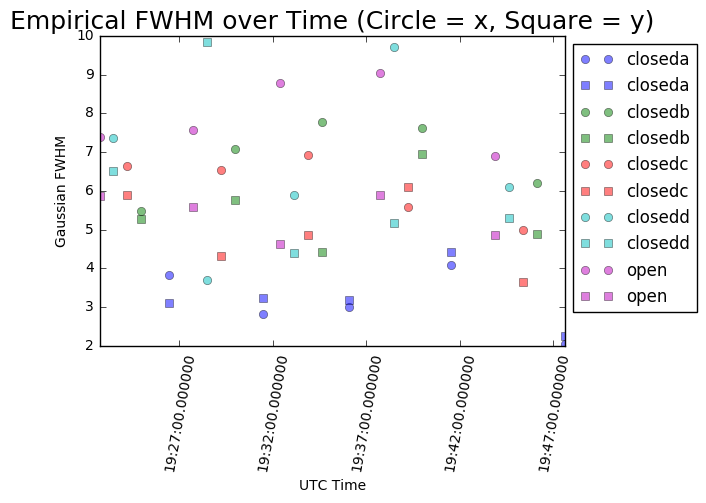

In [16]:
plt.figure()
for ii in range(len(stats_files)):
    data_label = stats_files[ii].split("/")[-1].split("_")[1].split(".")[0]
    TIME_UTC = []
    x_FWHM = []
    y_FWHM = []
    with open(stats_files[ii], "r") as f:
        reader = csv.reader(f)
        for row in reader:
            if row[0] == 'Image':
                labels = [row[5], row[10], row[15]]
                full_labels = row
            else:
                TIME_UTC.append(row[5])
                x_FWHM.append(float(row[12]))
                y_FWHM.append(float(row[13]))
                
    date_times = []
    for time in TIME_UTC:
        dt_obj = datetime.datetime.strptime(time, '%H:%M:%S')
        dt_obj.strftime("%I:%M:%S %p")
        date_times.append(dt_obj)
    dates = matplotlib.dates.date2num(date_times)
    plt.plot_date(dates, x_FWHM, colors[ii]+"o", alpha=0.5, label=data_label)
    plt.plot_date(dates, y_FWHM, colors[ii]+"s", alpha=0.5, label=data_label)

plt.legend(loc=2, bbox_to_anchor=(1, 1))
plt.xticks(rotation=80)
plt.xlabel("UTC Time")
plt.ylabel("Gaussian FWHM")
plt.title("Empirical FWHM over Time (Circle = x, Square = y)", fontsize=18)